In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Blues_r')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/marketing-data/ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [3]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

**there is no empty data**

In [4]:
#check for duplicate data
df.duplicated().sum()

184

In [5]:
#delete duplicate data with the amount 184 and check the amount of data after that
df = df.drop_duplicates()
"after",df.shape

('after', (2021, 39))

In [6]:
df.shape

(2021, 39)

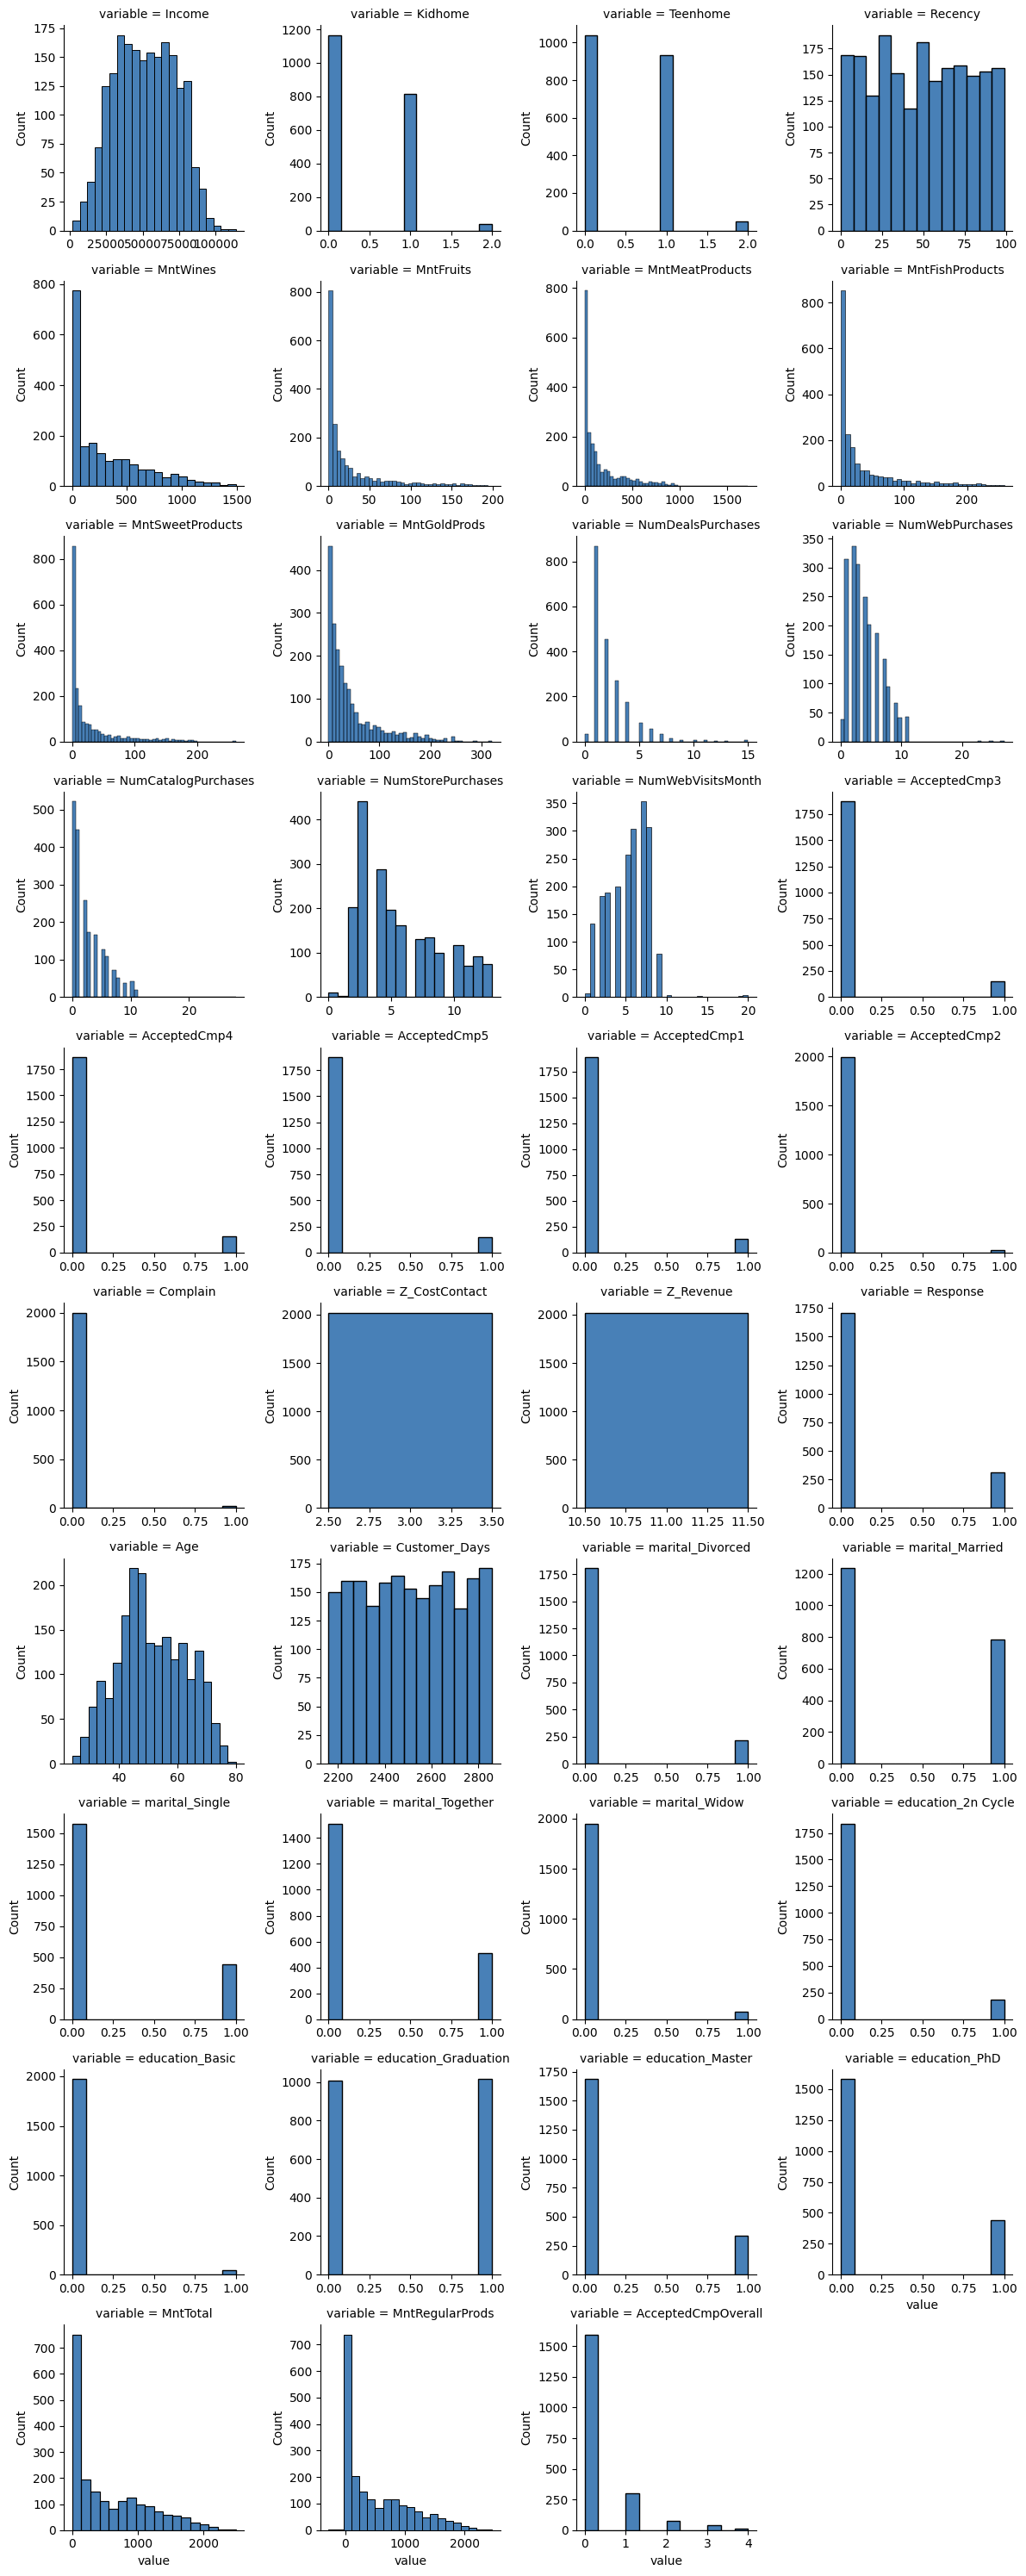

In [7]:
#Data distribution
hist = pd.melt(df, value_vars =df )
hist = sns.FacetGrid (hist, col='variable', col_wrap=4, sharex=False, sharey = False)
hist.map(sns.histplot, 'value')

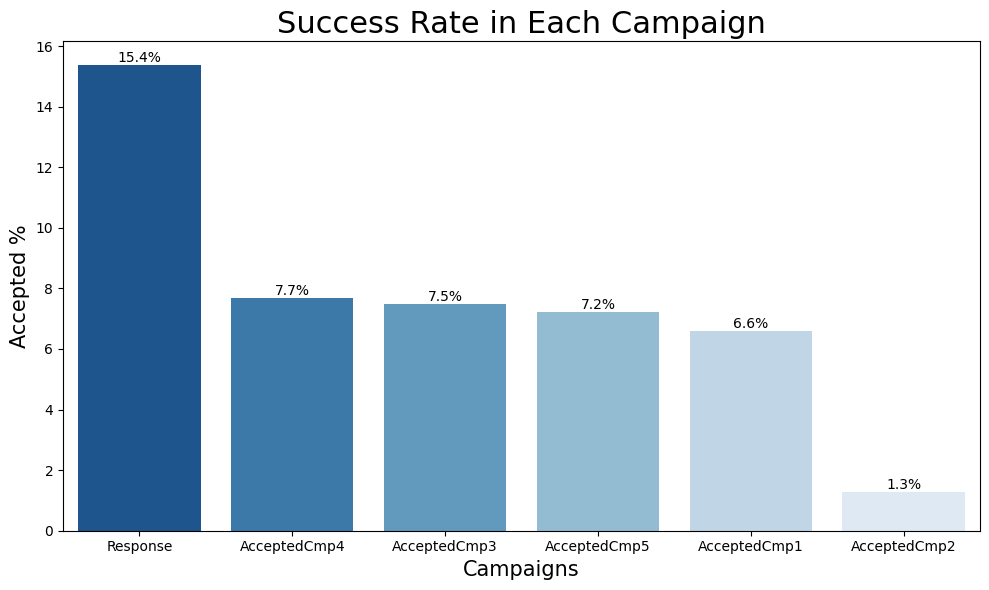

In [8]:
# Success Rate in Each Campaign
AcceptedCmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Create a DataFrame to store the percentage of accepted campaigns
campaigns = pd.DataFrame(df[AcceptedCmp].mean() * 100, columns=['Percent']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Percent', data=campaigns.sort_values('Percent', ascending=False))

# Set labels and title
plt.xlabel('Campaigns', size=15)
plt.ylabel('Accepted %', size=15)
plt.title('Success Rate in Each Campaign', size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

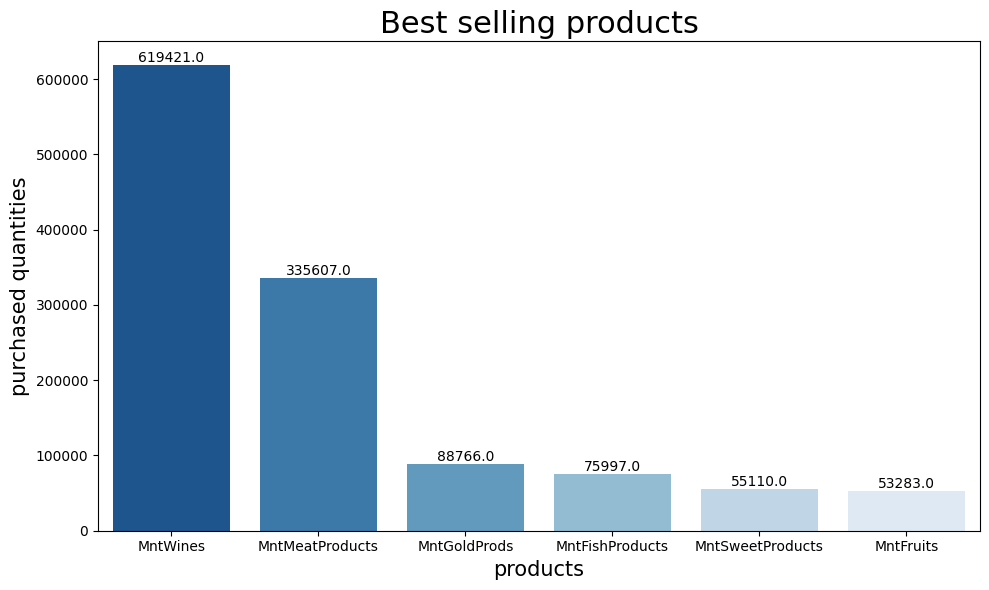

In [9]:
Products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']

# Create a DataFrame to store the percentage of accepted campaigns
Products_df  = pd.DataFrame(df[Products ].sum(), columns=['Sum']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Sum', data=Products_df.sort_values('Sum', ascending=False))

# Set labels and title
plt.xlabel('products' ,size=15)
plt.ylabel('purchased quantities' ,size=15)
plt.title('Best selling products',size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

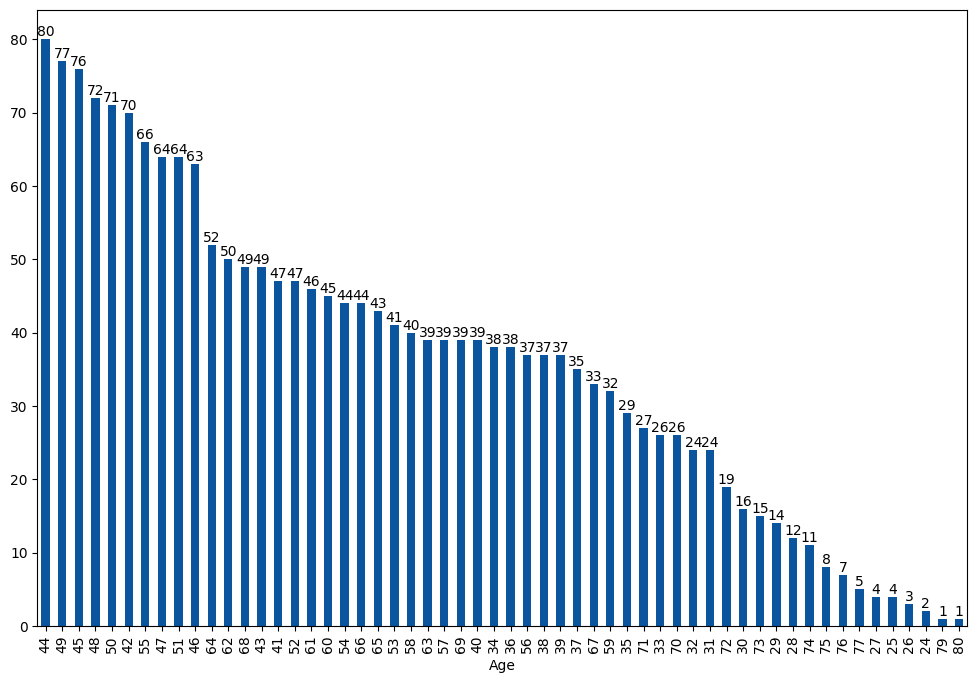

In [10]:
plt.figure(figsize=(12,8))
ax=df.Age.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show